## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [135]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"



In [136]:
import requests 
import pandas as pd
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))

# 如果是字符串例如 str= "runoob"
# len(str)
# 6
# 這邊會回傳字串長度
#
# l = [1,2,3,4,5]
# len(l)
# 如果是陣列會顯示
# 5 
# 這邊會顯示回傳陣列元素中的個數

# 同理可真以下的784594,他回傳的是字串總長度.


data[0:99]

# 此data[0:100]指的是從字串的0號到100號,最大長度應該為784594
# 奇妙的是 打出這個值784596竟然沒有出錯誤, 可見有效字串數後面多出的位數為"空格"?
# 原本以為最後自己jpg是因為有錯誤而循環的, 但是嘗試了幾個數字後似乎像是以上假設的補空格


784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm'

In [137]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
# split_tag = ()
# 因為資料讀取下來不會分辨空行(’\t’)與換行(’\n’)的符號，
# 所以每個字都算一個位元，我們接著要來處理空行與換行的分割。
# 先將逐行當作一個data: 透過 split('\n')

split_tag = '\n'
data = data.split(split_tag)
print(len(data))
data[0:3]

# 在此資料中有分"\n"換行,"\t"空格,
# 標準手法上是指進行換行作業,也就是\n, 所以會黏著前面一串代碼?+後面的jpg的url.
# 然而這邊的的data 已經被分隔成陣列,也就是data[0] = oooo"\t"http://....jpg
# 所以data[0:3] 表示我將data[0],data[1],data[2]陣列中三行的內容顯示出來

#----------------------------------------------------------------------

#data = data.split()
#print(len(data))
#data[0:3]

# 原本想著以這種寫法可以將"\t"和"\n"兩個一起切除做成總共陣列長度為20008的陣列檔
# 但是將 無意義和有意義的數據分隔成雙數跳位,到後面的整理上反而異常詭異與困難
# 我猜熟的人應該也是有辦法在後面再進行重新編號和到正常,但是這樣的做法我認為我失敗了.
# 這也有可能是從C#出來的一些宣告和陣列引領的想法概念上的差異吧.所以還是以上面為主.



9996


['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg']

## 將 txt 轉成 pandas dataframe

In [138]:
# 接下來要做的事是把剛才做成的陣列丟進去pandas dataframe
# 這個dataframe看似好用又簡單,但是以C#思維出的人來說,未宣告的陣列一值無法將腦袋轉過來

def split_data(data):
    name=[]
    url=[]
    for i in data:
        name.append(i.split("\t")[0])
        try:    
            url.append(i.split("\t")[1])
        except :
            url.append("")
    data_dict = {'name': name,
                'url':url}
    return data_dict

# 首先這個def split_data(data)很難理解是因為表面上是定義了一個從data取值過來的?東西.
# 說真的光這一行意義不明的原因是,如果你是pd,應該會有pd在def的相關處,可是未發現任何端倪
# 以上姑且先跳過,接下來宣告兩列各代表的意義,一格是當作他的名字name,一格是url,
# 在此宣告時也不必給定它的實際長度.

# 接下來這個for迴圈也搞死了C#出生的我,從上面的資料來看data裡面共有9996行的,name黏url
# 目前這個append我看不懂這個指令所以上網查了
# aList = [123, 'xyz', 'zara', 'abc'];
# aList.append( 2009 );
# print "Updated List : ", aList;
# Updated List :  [123, 'xyz', 'zara', 'abc', 2009]
# 這樣看來append的意義有點類似 c#陣列的 add

# **************************************************************
# 在上一個中已經將"\n"進行移除了
# 這邊奇妙也無法理解的是,上面的字串中每個元素中也只有一個"\t"
# 並不太難理解i.spilt("\t"[0],和 i.split("\t")[1],嘗試改了一些數值,
# 看起來[0]表示 name這列,[1] 表示url這列,
# 這邊的疑惑是那第一列的編號列在dp裡面不算是一列嗎??如果是的話應該是為[1],[2]才對.
# 這邊已經嘗試過使用[0],[2],最後只會顯示name這列,但是[1],[2],卻是直接報錯
# IndexError: list index out of range
# 可見規則為,從第一列開始.但是為何[0],[2]會被割成這樣
#            name	url
#0	n00015388_157	
#1	n00015388_238	
#2	n00015388_304	
#3	n00015388_327	
#4	n00015388_355	
# 因為[0]為name列也是第一列, 此陣列已宣告好第二列試url, 但是在spilt那整串分割出來的
# 只有 name+jpg,所以指定了2,3,4,5,6以上的數值將會被except補上空格來保持格式完整.


# data_dict這個編名也讓人感到疑惑,在上面宣告的時候不就是已經說了兩此兩列了嗎?
# 槓掉之後直接報錯沒有回傳值,那上面宣告的name=[],和yrl=[]應該只是兩個單陣列
# 在迴圈中輸入print(name)也毫無反應,原本想檢查內容是不是和所想的一樣
# 姑且認為他在執行迴圈中已經將name的內容加入倒data_dict所以顯示不出來東西.

# *********************************************
# 這三行的難度也是無敵高. 上面的return data_dict已經轉變為spilt_data(data)並且已分類
# 所以再拿另一個data容器來進行包裝上面的split_data(data)
# 最後終於出現了一個沒有宣告過的鬼東西的df_data直接出現,由後面pd的Dataframe格式放入data

data=split_data(data)
df_data = pd.DataFrame(data)
df_data.head(10)

# 最後這個head沒有宣告數量,是否就是為前頭最5個?
# 指定(3)有出現三個,再來是試指定區域輸入了(5:10)
# 錯誤SyntaxError: invalid syntax
# 由此推測這個head只有從前頭開始數幾個的意義

,name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...
7,n00015388_388,http://www.deweekkrant.nl/images/library/pictu...
8,n00015388_442,http://www.porschemania.it/discus/messages/815...
9,n00015388_474,http://farm1.static.flickr.com/72/225029238_80...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

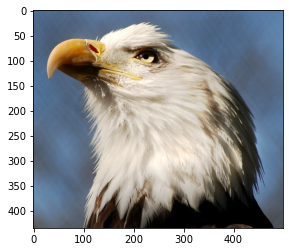

In [139]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

#以上是impot方面,讀取照片似乎有三種方式
# CV2
# PIL
# Skimage
# 讀下來的照片檔為BytesIO所以以這個形式轉換,再轉成Image檔
# 這個 PIL 感覺在編名上與 matplotlib.pyplot的 plt 很像,所以PIL變成Image的感覺?
# 以以前opencv的基礎看來,也不曉得這個 plt 的 byte 和 rgba編列還是令人感到疑惑與不安 


first_link = df_data.loc[0][1]
# 這句很明顯就是指令pd的圖片那一行的資訊

response = requests.get(first_link)
# 以前也沒碰過從網站找回應的方式搞,不過基礎看起來也只是取得回應資訊
img = Image.open(BytesIO(response.content))
#然後將回應的資訊掛到PIL裡面去開啟

# 這邊疑惑的是,直接打img也會出現,但圖片較大? 
# 我在此也沒有做過resize
# 詭異的是最後這行plt.show()真的有必要嗎?
# 還是在意義上 因為plt.imshow(img) 下面還是包了一串怪字和圖片,所以才想單純分離出圖片?

#img
plt.imshow(img)
plt.show()




In [140]:
def img2arr_fromURLs(url_list, resize = False):
    img_list=[]
    for url in url_list:
        response = requests.get(url)
        try:
            img=Image.open(BytesIO(response.content))
        except :
            pass
        else:
            img_list.append(img)
    return img_list

# 這段應該是本段最難以理解的部分了吧...
# 上面這串也只是類似上面的def定義,與return回傳.
# 差不多的東西看了第二次之後會發現,img_list只存在與此迴圈,以c#的角度來想的話,
# 原本需要一個這樣的1.函數宣告與內容,2.外部丟值進去調用, 在python就剩這一個了
# 再來python最不習慣的是沒有大誇號{}來指定範圍,而是用空格的方式來調用.

# 回到此程式碼,從第三行 for url in url_list: 看得出來是從url_list裡面去叫url,
# 但是.....我沒有丟任何東西進url_list吧??為何這樣能夠成立也是一個謎團.
# 喔喔喔喔喔喔看到這裡其實呼應了上面我所說的C#舊的方式,這部分只寫了函數,
# 下一階段才將東西丟進去調用,這樣合理多了.

# 再來最後是陷阱的部分,看起來似乎是有無回應的url部分,以下其實我也不知道那個resize
# 實際上到底有沒有用處不清楚,而且底下的result的宣告格是應該是呼應上頭的img_list
# 所以就會變成一長串的url_list來進行調用,然後開始try沒有回應的打pass

Total images that we got: 5 


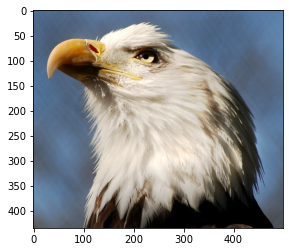

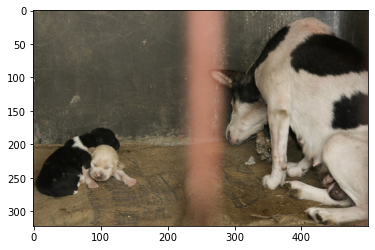

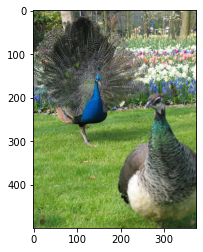

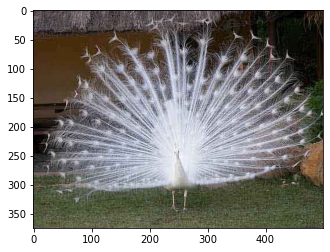

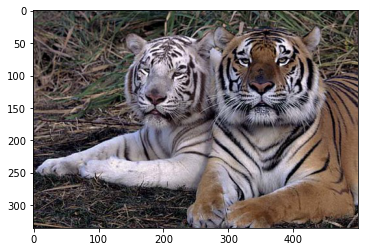

In [141]:
result = img2arr_fromURLs(df_data['url'][0:10])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()
    
# 說真的這題的難度比想像中的高太多,從python句法的不熟悉開始到for迴圈和def函數宣告,
# 沒有一堆大括號隔著真的非常的不習慣,也會讓人想說他到底跑了沒,不過整體來說jupiter太強